In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D,Dense,Dropout
from tensorflow.keras.models  import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import matplotlib.pyplot as plt
def plot_imgs(item_dir, top=10):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:5]
  
    plt.figure(figsize=(10, 10))
  
    for idx, img_path in enumerate(item_files):
        plt.subplot(5, 5, idx+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray') 

In [3]:
import os
print(os.listdir('C:/Users/PC/Garbage classification'))

['Garbage classification']


In [4]:
data_path="C:/Users/PC/Garbage classification/Garbage classification"

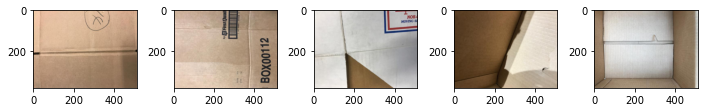

In [5]:
plot_imgs("C:/Users/PC/Garbage classification/Garbage classification/cardboard")

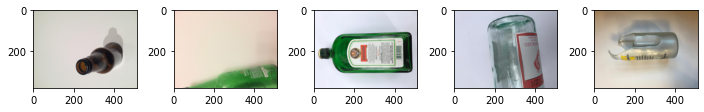

In [6]:
plot_imgs(data_path+'/glass')

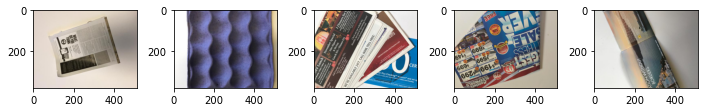

In [7]:
plot_imgs(data_path+'/paper')

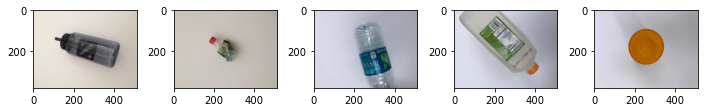

In [8]:
plot_imgs(data_path+'/plastic')

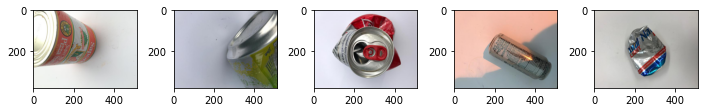

In [9]:
plot_imgs(data_path+'/metal')

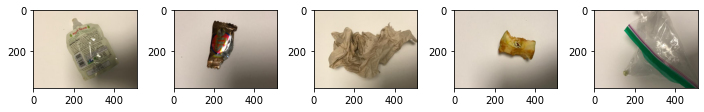

In [10]:
plot_imgs(data_path+'/trash')

In [11]:
batch_size = 32

In [12]:
# Data Generator
train=ImageDataGenerator(horizontal_flip=True, vertical_flip=True,validation_split=0.1,rescale=1./255,
                         shear_range = 0.1,zoom_range = 0.1,
                         width_shift_range = 0.1,
                         height_shift_range = 0.1,)

test=ImageDataGenerator(rescale=1./255,validation_split=0.1)

train_generator=train.flow_from_directory(data_path,target_size=(300,300),batch_size=batch_size,class_mode='categorical',subset='training')

test_generator=test.flow_from_directory(data_path,target_size=(300,300),batch_size=batch_size,class_mode='categorical',subset='validation')

Found 2276 images belonging to 6 classes.
Found 251 images belonging to 6 classes.


In [13]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [14]:
num_classes = 6

In [15]:
# Build Model
model = Sequential()
   
model.add(Conv2D(32,(3,3), padding='same', input_shape=(300,300,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Conv2D(32,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 43808)             0

In [16]:
# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
model_path="garbage_cnn.h5"
checkpoint1 = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint1]

In [18]:
num_epochs = 100
step_size_train=train_generator.n//train_generator.batch_size
step_size_test =test_generator.n//test_generator.batch_size

In [ ]:
# Train Model
history = model.fit_generator(train_generator, epochs=num_epochs, steps_per_epoch=step_size_train,validation_data=test_generator,
                    validation_steps=step_size_test,callbacks=callbacks_list)

In [ ]:
# Evaluate Model
score = model.evaluate_generator(test_generator, steps=step_size_test)
print(score)

In [ ]:
model.save("garbage_cnn.h5")

In [ ]:
from keras.models import load_model
import numpy as np
import cv2
model=load_model("garbge_cnn.h5")

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy")

In [ ]:
from skimage.transform import resize
def detect(frame):
    try:
        img=resize(frame,(64,64))
        img=np.expand_dims(img,axis=0)
        if(np.max(img)>1):
            img=img/255.0
        prediction=model.predict(img)
        print(prediction)
        prediction_class=model.predict_classes(img)
        print(prediction_class)
    except AttributeError:
        print("shape not found")

In [ ]:
frame=cv2.imread("cardboard1.jpg")
data=detect(frame)